In [1]:
import numpy as np
i = complex(0, 1)

# To be used in the Heston pricer
def fHeston(s, St, K, r, T, sigma, kappa, theta, volvol, rho):
    
    # To be used a lot
    prod = rho * sigma * i * s
    
    # Calculate d
    d1 = (prod - kappa)**2
    
    
    d2 = (sigma**2) * (i * s + s**2)

    
    d = np.sqrt(d1 + d2)
    
    
    # Calculate g
    g1 = kappa - prod - d
    g2 = kappa - prod + d
    g = g1 / g2
    
    # Calculate first exponential
    exp1 = np.exp(np.log(St) * i * s) * np.exp(i * s * r * T)
    exp2 = 1 - g * np.exp(-d * T)
    exp3 = 1 - g
    mainExp1 = exp1 * np.power(exp2 / exp3, -2 * theta * kappa/(sigma**2))
    
    # Calculate second exponential
    exp4 = theta * kappa * T / (sigma**2)
    exp5 = volvol / (sigma**2)
    exp6 = (1 - np.exp(-d * T)) / (1 - g * np.exp(-d * T))
    mainExp2 = np.exp((exp4 * g1) + (exp5 * g1 * exp6))
    
    return (mainExp1 * mainExp2)

price = []

# Heston Pricer
def priceHestonMid(St,K,T):
    
    P, iterations, maxNumber = 0, 100, 100
    
    ds = 0.1
    
    element1 = 0.5 * (St - K * np.exp(-r * T))
    
    # Calculate the complex integral
    # Using j instead of i to avoid confusion
    for j in range(1, iterations):
        
        s1 = ds * (2 * j + 1) / 2
        s2 = s1 - i
        
        numerator1 = fHeston(s2, St, K, r, T, 
                             sigma, kappa, theta, volvol, rho)
        numerator2 = K * fHeston(s1, St, K, r, T, 
                               sigma, kappa, theta, volvol, rho)
        
        denominator = np.exp(np.log(K) * i * s1) * i * s1
        
        P += ds * (numerator1 - numerator2) / denominator
        
                
        element2 = P / np.pi
        price.append(np.real((element1 + element2)))
        
    
        
    element2 = P / np.pi
    
    return np.real((element1 + element2))

In [2]:
# current price
St = 1000
# strike
K = 100
# risk free interest rate
r = 0.1
# time to maturity
T = 1
# volatility 
sigma = 0.1
# kappa = ?
kappa = 0.2
# theta = ?
theta = 0.1
# volatility of volatility
volvol = 0.1
# rho = ?
rho = 0.1

In [3]:
priceHestonMid(St,K,T)

878.7098664857695

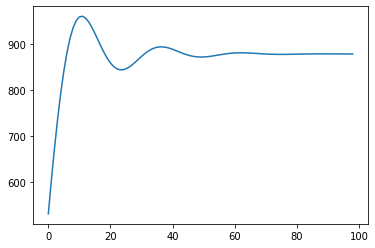

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(price) # plotting by columns
plt.show()

In [5]:
def fHeston(s, St, K, r, T, sigma, kappa, theta, volvol, rho):
    
    # To be used a lot
    prod = rho * sigma * i * s
    
    # Calculate d
    d1 = (prod - kappa)**2    
    d2 = (sigma**2) * (i * s + s**2)
    d = np.sqrt(d1 + d2)
   
    # Calculate g   
    g1 = kappa - prod - d
    g2 = kappa - prod + d
    g = g1 / g2
    
    # Calculate first exponential
    exp1 = np.exp(np.log(St) * i * s) * np.exp(i * s * r * T)
    exp2 = 1 - g * np.exp(-d * T)
    exp3 = 1 - g
    
    # @DEV @alex 
    # n = -2 * theta * kappa/(sigma**2)
    # (exp2/exp3)**n
    
    print(str(exp2/exp3))
    print(str(-2 * theta * kappa/(sigma**2)))
    
    mainExp1 = exp1 * np.power(exp2 / exp3, -2 * theta * kappa/(sigma**2))
    
    
    #return g
    

In [6]:
fHeston(-0.85, St, K, r, T, sigma, kappa, theta, volvol, rho)

(0.9921013678041934+0.009044467407602381j)
-4.0


In [ ]:
""" JAVA 

	public static ComplexNumber pow(ComplexNumber z, int power)
	{
		ComplexNumber output = new ComplexNumber(z.getRe(),z.getIm());
		for(int i = 1; i < power; i++)
		{
			double _real = output.real*z.real - output.imaginary*z.imaginary;
			double _imaginary = output.real*z.imaginary + output.imaginary*z.real;
			output = new ComplexNumber(_real,_imaginary);
		}
		return output;
	}

"""

In [ ]:
""" SOLIDITY test 


function complexPOW(int re, int im, int n) public pure returns (int,int) {

    for(int i = 1; i < power; i++) {
        re = re*re - im*im;
        im = re*im + im*re;
        }
    
    return (re,im);
    }

"""


Let z = -2 + 2i

Arg(z) = tan-1 (2/-2) = 3π/4

Absolute value = \sqrt{(-2)^2 + (2)^2} = 2√2

Applying De Moivre’s Theorem,

z8 = [2√2{cos(3π/4) + isin(3π/4)}]8

= (2√2)8 [cos(24π/4) + isin(24π/4)]

= 4096(cos 6π + isin 6π) 

= 4096

In [55]:

z = complex(-2,2)

math.atan2(2,-2)

r,theta = cmath.polar(z)

n = 8

re = r**n * (math.cos(n*theta))
im = r**n * (math.sin(n*theta))

In [58]:
print(re)
print(im)

4096.000000000002
-3.0096919735845363e-12


In [ ]:
-850000000000000000
1000000000000000000000
100000000000000000000
10000000000000000000

In [ ]:
0.2

In [ ]:
a = complex(-0.017519420253827997,0.019129332641010049)
b = complex(0.4174632196735832,-0.003226120876107708)

a / b

In [ ]:
a = complex(2,2)
b = complex(3,4)

a / b

In [ ]:
s1 = 0.1 * (2 * 1 + 1) / 2
s2 = s1 - 1

In [ ]:
s2

In [ ]:
np.sqrt

In [ ]:
## @dev more precise way of calculating atan2

# https://dspguru.com/dsp/tricks/fixed-point-atan2-with-self-normalization/
def arctan2(y, x):
    coeff_1 = math.pi/4
    coeff_2 = 3*coeff_1
    abs_y = abs(y)+1e-10
    
    if x>=0:
        r = (x - abs_y) / (x + abs_y)
        # theta1
        angle =0.1963 * r**3 - 0.9817 * r + coeff_1
    else:
        r = (x + abs_y) / (abs_y - x)
        # theta2
        angle = 0.1963 * r**3 - 0.9817 * r + coeff_2
   
    if y < 0:
        return(-angle)
    else:
        return(angle)


PI = 3.1415926535897933e+18

def EffienctArctan2(y, x):
    coeff_1 = PI/4
    coeff_2 = 3*coeff_1
    abs_y = abs(y)+1e8
    
    if x>=0:
        r = (x - abs_y) * 1e18 / (x + abs_y)
        angle = (coeff_1 * 1e18 - coeff_1 * r) / 1e18
    else:
        r = (x + abs_y) * 1e18 / (abs_y - x)
        angle = (coeff_2 * 1e18 - coeff_1 * r) / 1e18
   
    if y < 0:
        return(-angle)
    else:
        return(angle)
    
EffienctArctan2(4e18,2e18)

In [ ]:
PI = 3.1415926535897933e+18

In [ ]:
PI = 3.1415926535897933e+18

def arctan2(y, x):
    coeff_1 = math.pi/4
    coeff_2 = 3*coeff_1
    abs_y = abs(y)+1e-10
    
    if x>=0:
        r = (x - abs_y) / (x + abs_y)
        # theta1
        angle =0.1963 * r**3 - 0.9817 * r + coeff_1
    else:
        r = (x + abs_y) / (abs_y - x)
        # theta2
        angle = 0.1963 * r**3 - 0.9817 * r + coeff_2
   
    if y < 0:
        return(-angle)
    else:
        return(angle)


In [ ]:
arctan2(4,5)

In [ ]:
import math

In [ ]:
math.atan2(4,2)

In [ ]:
1e18**5

In [ ]:
def arctan2(y, x):
    coeff_1 = math.pi/4
    coeff_2 = 3*coeff_1
    abs_y = abs(y)+1e-10
    

    r = (x - abs_y) * 1e18 / (x + abs_y)
        # theta1
    angle = (1963e14 * (r/1e18)**3) - (9817e14 * r)/ 1e18 + coeff_1
    

    
    return angle

arctan2(4e18,5e18)

In [ ]:
(1963e14 * (r/1e18)**3)

In [ ]:
340282366920938463463374607431768211455/1e54

In [ ]:
PI = 3.1415926535897933e+18

def arctan2(y, x):
    coeff_1 =  PI/4
    coeff_2 = 3*coeff_1
    abs_y = abs(y)+1e8
    
    if x>=0:
        r = (x - abs_y) * 1e18 / (x + abs_y)
        # theta1
        angle = (1963e14 * r**3) / 1e54 - (9817e14 * r) / 1e18 + coeff_1
    else:
        r = (x + abs_y) * 1e18 / (abs_y - x)
        # theta2
        angle = (1963e14 * r**3) / 1e54 - (9817e14 * r) / 1e18 + coeff_2
   
    if y < 0:
        return(-angle)
    else:
        return(angle)

arctan2(6e18,2e18)

In [ ]:
import math
math.atan2(6,2)

In [ ]:
def x3(x):
    x /= 1e18
    
    x = x**3
    
    x *= 1e18
    
    return x

In [ ]:
x3(-6.666666666722222e+17)

In [ ]:
def arctan2(y, x):
    coeff_1 =  PI/4
    coeff_2 = 3*coeff_1
    abs_y = abs(y)+1e8
    
    if x>=0:
        r = (x - abs_y) * 1e18 / (x + abs_y)
        return r

In [ ]:
arctan2(5e18,1e18)

In [ ]:
6.6**3

In [ ]:
1923349e12

In [ ]:
1923949395923943273/1e18

In [ ]:
1e6**3

In [ ]:
4.6345345345**3

In [ ]:
46345e14**3

In [ ]:
46345**3

In [ ]:
math.atan2(4,5)

In [ ]:
def arctan2(y, x):
    coeff_1 =  PI/4
    coeff_2 = 3*coeff_1
    abs_y = abs(y)+1e8
    r = (x - abs_y) * 1e18 / (x + abs_y)
    return r

In [ ]:
arctan2(4e18,5e18)

In [ ]:
import numpy as np

In [ ]:
np.power(complex(0,1),0.4)